In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

all_cars = []
url = "https://turbo.az/autos?page"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
ls = soup.find_all("a", class_='products-i__link')

for i in ls:
    response = requests.get("https://turbo.az/" + i['href'])
    soup = BeautifulSoup(response.content, 'html.parser')
    label = soup.find_all('div', class_="products-i__bottom")
    name = soup.find_all("span", class_="products-i__name products-i__bottom-text")
    price = soup.find("div", class_="product-price")
    dc = {}
    for j in range(len(label)):
        dc[label[j].text] = name[j].text
    if price is not None:
        dc["Price"] = price.text.strip()
    all_cars.append(dc)

df = pd.DataFrame(all_cars)
print(response)

<Response [403]>


In [2]:
df

""


In [3]:
import pandas as pd
import numpy as np
from scipy.stats import jarque_bera

df = pd.read_csv('car_datamain.csv')
df.dropna(inplace=True)  # Drop rows with missing values

# Convert 'Price' column to numeric




# Remove non-numeric characters from 'Price' column and convert to numeric
df['Price'] = df['Price'].replace('[^\d.]', '', regex=True).astype(float)

# Remove ' km' and spaces from 'Yürüş' column and convert to numeric
df['Yürüş'] = df['Yürüş'].str.replace(' km', '').str.replace(' ', '').astype(float)

# Print the updated DataFrame
print(df)


columns = df.columns

for column in columns:
    count = df[column].describe()
    print('{} - Number of values in the column: {}'.format(column, count))

    if pd.to_numeric(df[column], errors='coerce').notnull().all():
        total = df[column].sum()
        count = df[column].count()
        mean = total / count
        median = df[column].median()
        minimum = df[column].min()
        maximum = df[column].max()
        std = df[column].std()
        variance = df[column].var()
        sem = df[column].sem()
        quantile_25 = df[column].quantile(0.25)
        quantile_50 = df[column].quantile(0.50)
        quantile_75 = df[column].quantile(0.75)
        
        print("Statistics for column '{}':".format(column))
        print("Mean: {:.2f}".format(mean))
        print("Median: {:.2f}".format(median))
        print("Minimum: {:.2f}".format(minimum))
        print("Maximum: {:.2f}".format(maximum))
        print("Standard Deviation: {:.2f}".format(std))
        print("Variance: {:.2f}".format(variance))
        print("Standard Error of the Mean: {:.2f}".format(sem))
        print("25th Percentile: {:.2f}".format(quantile_25))
        print("50th Percentile (Median): {:.2f}".format(quantile_50))
        print("75th Percentile: {:.2f}".format(quantile_75))
        print("\n")
        
        # Perform Jarque-Bera normality test
        column_values = df[column]
        jb_test = jarque_bera(column_values)
        print("Jarque-Bera normality test result for '{}':".format(column))
        print("Statistic: {:.2f}".format(jb_test.statistic))
        print("p-value: {:.2f}".format(jb_test.pvalue))
        print("\n")
    else:
        print("Column '{}' is not numeric.\n".format(column))


   Şəhər       Marka        Model  Buraxılış ili         Ban növü  Rəng  \
0   Bakı  Land Rover     RR Sport           2022  Offroader / SUV  Qara   
1   Bakı       Honda        e:NS1           2023  Offroader / SUV    Ağ   
2   Bakı  Land Rover     RR Velar           2021  Offroader / SUV    Ağ   
3   Bakı        Audi           Q7           2018  Offroader / SUV   Boz   
4   Bakı     Porsche       Taycan           2021          Hetçbek  Mavi   
5   Bakı    Infiniti         M37S           2011            Sedan  Qara   
6   Bakı    Mercedes          190           1993            Sedan    Ağ   
7   Bakı         BMW         X6 M           2012  Offroader / SUV    Ağ   
8   Bakı     Hyundai       Sonata           1997            Sedan  Qara   
9   Bakı        Ford        Focus           2008          Hetçbek  Qara   
10  Bakı    Mercedes        E 220           2014            Sedan    Ağ   
11  Bakı    Mercedes        E 220           2009            Sedan    Ağ   
12  Bakı        Opel     

In [4]:
df.describe()

,Buraxılış ili,Yürüş,Price,Yerlərin sayı,Sahiblər
count,16.000000,16.000000,1.600000e+01,16.000000,16.00000
mean,2010.500000,169862.437500,2.366631e+10,4.937500,1.25000
std,9.062744,160285.357457,5.188128e+10,0.442531,0.68313
min,1993.000000,0.000000,3.800000e+03,4.000000,0.00000
25%,2005.250000,32500.000000,9.375000e+03,5.000000,1.00000
50%,2010.000000,150500.000000,8.500274e+08,5.000000,1.00000
75%,2018.750000,283750.000000,3.537560e+09,5.000000,2.00000
max,2023.000000,550000.000000,1.785003e+11,6.000000,2.00000


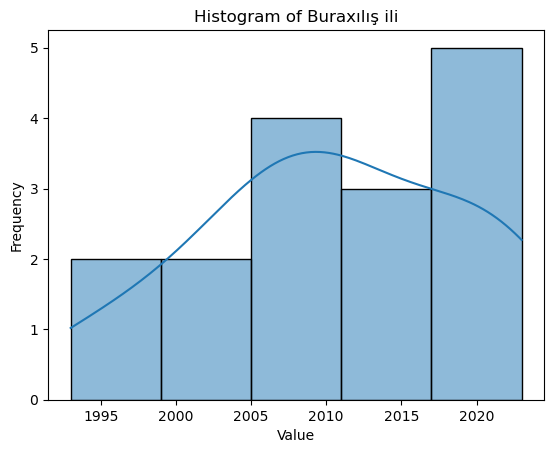

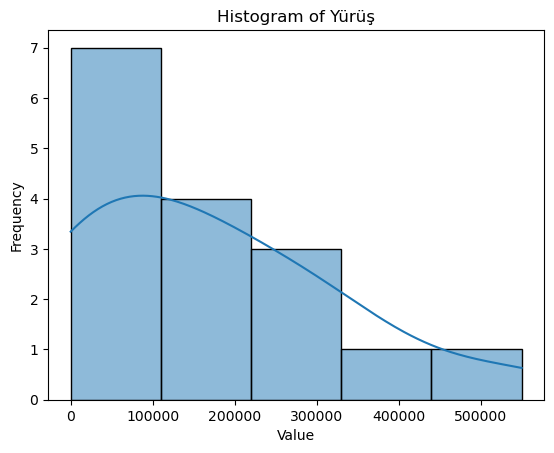

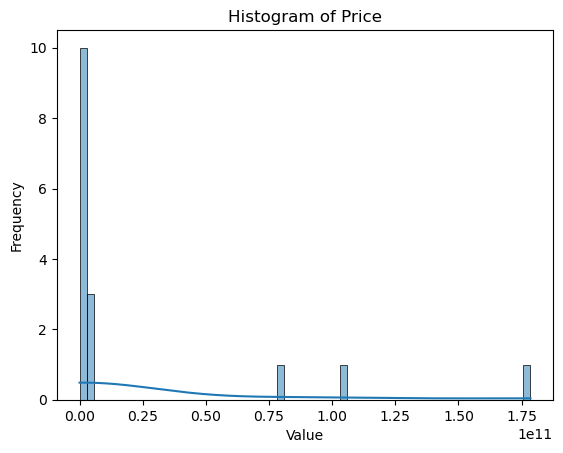

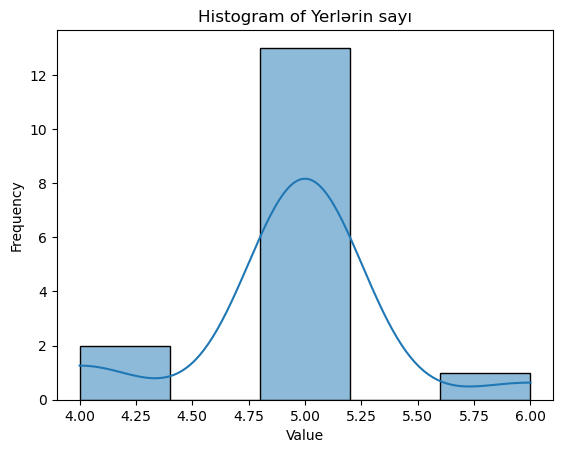

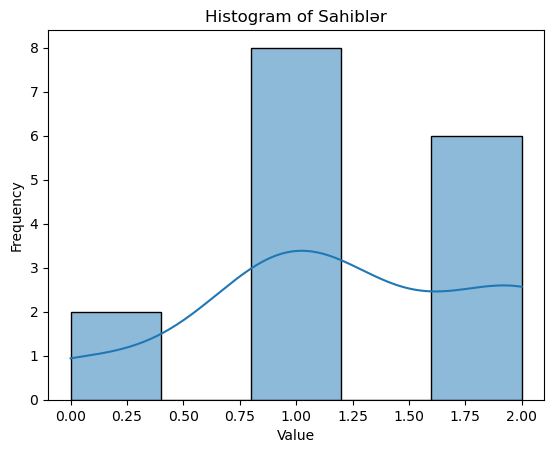

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Select numeric columns
numeric_columns = df.select_dtypes(include=[int,float])

# Plot histograms for numeric columns
for column in numeric_columns:
    sns.histplot(data=df, x=column, kde=True)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()


In [6]:
import numpy as np
from scipy.stats import jarque_bera

numeric_columns = df.select_dtypes(include=[np.number])
for column in numeric_columns:
    column_values = df[column]
    
    # Calculate standard deviation
    std_deviation = column_values.std()
    print(f"Standard Deviation of {column}: {std_deviation}")

    # Perform Jarque-Bera test
    jb_statistic, jb_pvalue = jarque_bera(column_values)
    print(f"Jarque-Bera test result for {column}:")
    print(f"Statistic: {jb_statistic}")
    print(f"p-value: {jb_pvalue}")
    print()




Standard Deviation of Buraxılış ili: 9.062744249582096
Jarque-Bera test result for Buraxılış ili:
Statistic: 0.6337179585004942
p-value: 0.7284334721173011

Standard Deviation of Yürüş: 160285.35745682605
Jarque-Bera test result for Yürüş:
Statistic: 1.9143106506201089
p-value: 0.38398364236480387

Standard Deviation of Price: 51881283439.85697
Jarque-Bera test result for Price:
Statistic: 18.70677618624433
p-value: 8.667127073849538e-05

Standard Deviation of Yerlərin sayı: 0.4425306015783918
Jarque-Bera test result for Yerlərin sayı:
Statistic: 3.6435895433875016
p-value: 0.16173521250550982

Standard Deviation of Sahiblər: 0.6831300510639732
Jarque-Bera test result for Sahiblər:
Statistic: 0.6808274330140219
p-value: 0.7114759125362669



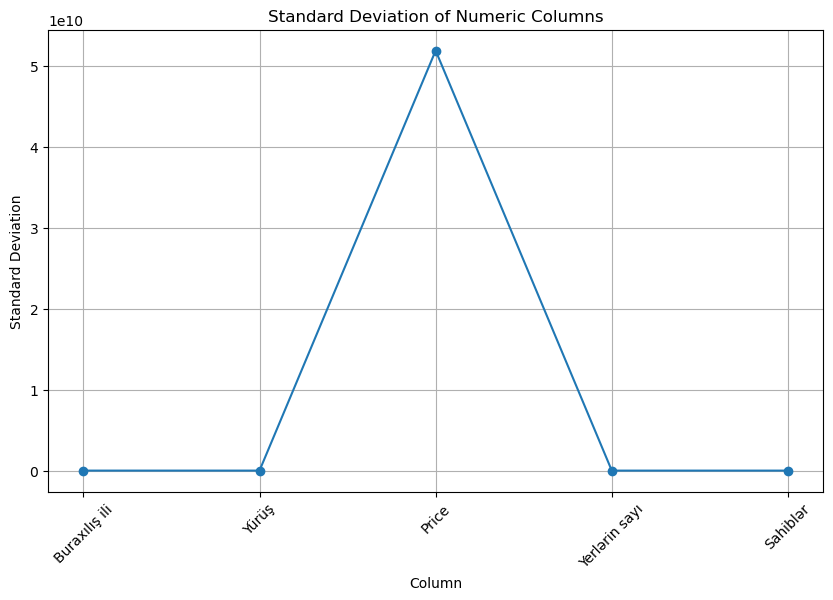

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame


# Select numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate standard deviation for each column
std_deviation = numeric_columns.std()

# Plot line chart for standard deviation
plt.figure(figsize=(10, 6))
plt.plot(std_deviation.index, std_deviation.values, marker='o')
plt.xlabel('Column')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Numeric Columns')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


 

In [74]:
import pandas as pd
import numpy as np


# Select numeric columns
numeric_columns = ['Sahiblər','Buraxılış ili','Yerlərin sayı','Price','Sahiblər']
# Calculate correlation matrix
numeric_df = df[numeric_columns]
correlation_matrix = numeric_df.corr()

# Print correlation matrix
print(correlation_matrix)



               Sahiblər  Buraxılış ili  Yerlərin sayı     Price  Sahiblər
Sahiblər       1.000000      -0.355353       0.055132 -0.175792  1.000000
Buraxılış ili -0.355353       1.000000       0.008311  0.578801 -0.355353
Yerlərin sayı  0.055132       0.008311       1.000000 -0.236171  0.055132
Price         -0.175792       0.578801      -0.236171  1.000000 -0.175792
Sahiblər       1.000000      -0.355353       0.055132 -0.175792  1.000000


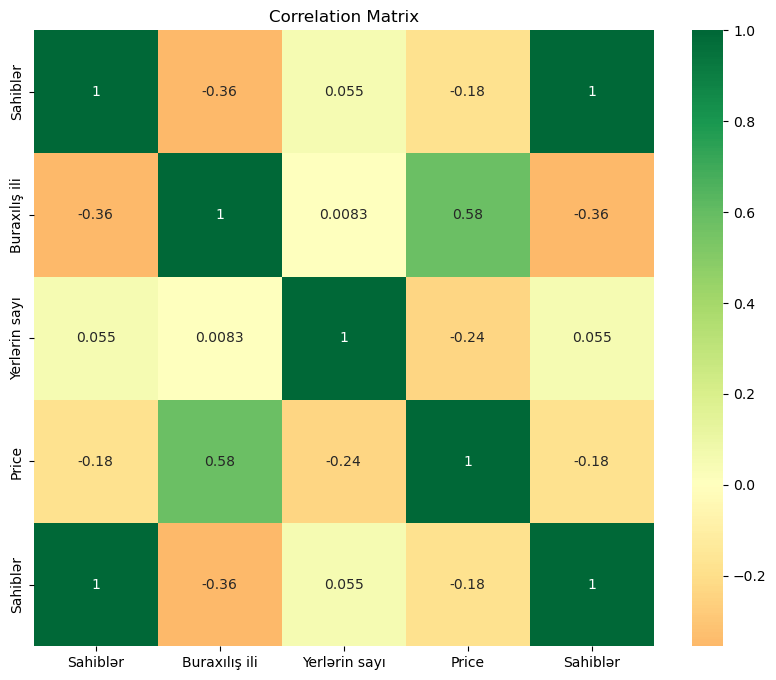

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', center=0)
plt.title('Correlation Matrix')
plt.show()


In [76]:
from flask import Flask, request, jsonify
import mysql.connector

app = Flask(__name__)



In [77]:
app.config['MYSQL_HOST'] = 'localhost'
app.config['MYSQL_USER'] = 'root'
app.config['MYSQL_PASSWORD'] = 'Salam123'
app.config['MYSQL_DB'] = 'turboaz'

conn = mysql.connector.connect(
    host=app.config['MYSQL_HOST'],
    user=app.config['MYSQL_USER'],
    password=app.config['MYSQL_PASSWORD'],
    database=app.config['MYSQL_DB']
)


In [78]:
from flask import Flask, jsonify, request
import mysql.connector

app = Flask(__name__)

# # Enter the required information for the database connection
host = "localhost"
user = "root"
password = "Salam123"
database = "turboaz"

# Create database connection
conn = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database
)

# show all the cars
@app.route('/cars', methods=['GET'])
def get_all_cars():
    cursor = conn.cursor()
    cursor.execute('SELECT * FROM car_datamain')
    cars = cursor.fetchall()
    cursor.close()
    car_list = []
    for car in cars:
        car_dict = {
            'id': car[0],
            'sehir': car[1],
            'marka': car[2],
            'model': car[3],
            'buraxilis_ili': car[4],
            'ban_novu': car[5],
            'reng': car[6],
            'muharrik': car[7],
            'yurus': car[8],
            'surus_qutusu': car[9],
            'oturucu': car[10],
            'yeni': car[11],
            'yerlerin_sayi': car[12],
            'sahibler': car[13],
            'veziyyeti': car[14],
            'hansi_bazar_ucun_yigilib': car[15],
            'price': car[16]
        }
        car_list.append(car_dict)
    return jsonify(car_list)

# Fetch information of a specific car
@app.route('/cars/<int:car_id>', methods=['GET'])
def get_car(car_id):
    cursor = conn.cursor()
    cursor.execute('SELECT * FROM car_datamain WHERE id = %s', (car_id,))
    car = cursor.fetchone()
    cursor.close()
    if car:
        car_dict = {
            'id': car[0],
            'sehir': car[1],
            'marka': car[2],
            'model': car[3],
            'buraxilis_ili': car[4],
            'ban_novu': car[5],
            'reng': car[6],
            'muharrik': car[7],
            'yurus': car[8],
            'surus_qutusu': car[9],
            'oturucu': car[10],
            'yeni': car[11],
            'yerlerin_sayi': car[12],
            'sahibler': car[13],
            'veziyyeti': car[14],
            'hansi_bazar_ucun_yigilib': car[15],
            'price': car[16]
        }
        return jsonify(car_dict)
    else:
        return jsonify({'message': 'Car not found'}), 404

# create a new car
@app.route('/cars', methods=['POST'])
def create_car():
    car_data = request.get_json()
    sehir = car_data.get('sehir')
    marka = car_data.get('marka')
    model = car_data.get('model')
    buraxilis_ili = car_data.get('buraxilis_ili')
    ban_novu = car_data.get('ban_novu')
    reng = car_data.get('reng')
    muharrik = car_data.get('muharrik')
    yurus = car_data.get('yurus')
    surus_qutusu = car_data.get('surus_qutusu')
    oturucu = car_data.get('oturucu')
    yeni = car_data.get('yeni')
    yerlerin_sayi = car_data.get('yerlerin_sayi')
    sahibler = car_data.get('sahibler')
    veziyyeti = car_data.get('veziyyeti')
    hansi_bazar_ucun_yigilib = car_data.get('hansi_bazar_ucun_yigilib')
    price = car_data.get('price')

    if not sehir or not marka or not model or not buraxilis_ili or not ban_novu or not reng or not muharrik or not yurus or not surus_qutusu or not oturucu or not yeni or not yerlerin_sayi or not sahibler or not veziyyeti or not hansi_bazar_ucun_yigilib or not price:
        return jsonify({'message': 'Invalid data'}), 400

    cursor = conn.cursor()
    cursor.execute('INSERT INTO car_datamain (sehir, marka, model, buraxilis_ili, ban_novu, reng, muharrik, yurus, surus_qutusu, oturucu, yeni, yerlerin_sayi, sahibler, veziyyeti, hansi_bazar_ucun_yigilib, price) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)',
                   (sehir, marka, model, buraxilis_ili, ban_novu, reng, muharrik, yurus, surus_qutusu, oturucu, yeni, yerlerin_sayi, sahibler, veziyyeti, hansi_bazar_ucun_yigilib, price))
    conn.commit()
    cursor.close()
    return jsonify({'message': 'Car created successfully'}), 201

#Update a car's information
@app.route('/cars/<int:car_id>', methods=['PUT'])
def update_car(car_id):
    car_data = request.get_json()
    sehir = car_data.get('sehir')
    marka = car_data.get('marka')
    model = car_data.get('model')
    buraxilis_ili = car_data.get('buraxilis_ili')
    ban_novu = car_data.get('ban_novu')
    reng = car_data.get('reng')
    muharrik = car_data.get('muharrik')
    yurus = car_data.get('yurus')
    surus_qutusu = car_data.get('surus_qutusu')
    oturucu = car_data.get('oturucu')
    yeni = car_data.get('yeni')
    yerlerin_sayi = car_data.get('yerlerin_sayi')
    sahibler = car_data.get('sahibler')
    veziyyeti = car_data.get('veziyyeti')
    hansi_bazar_ucun_yigilib = car_data.get('hansi_bazar_ucun_yigilib')
    price = car_data.get('price')

    if not sehir or not marka or not model or not buraxilis_ili or not ban_novu or not reng or not muharrik or not yurus or not surus_qutusu or not oturucu or not yeni or not yerlerin_sayi or not sahibler or not veziyyeti or not hansi_bazar_ucun_yigilib or not price:
        return jsonify({'message': 'Invalid data'}), 400

    cursor = conn.cursor()
    cursor.execute('UPDATE car_datamain SET sehir = %s, marka = %s, model = %s, buraxilis_ili = %s, ban_novu = %s, reng = %s, muharrik = %s, yurus = %s, surus_qutusu = %s, oturucu = %s, yeni = %s, yerlerin_sayi = %s, sahibler = %s, veziyyeti = %s, hansi_bazar_ucun_yigilib = %s, price = %s WHERE id = %s',
                   (sehir, marka, model, buraxilis_ili, ban_novu, reng, muharrik, yurus, surus_qutusu, oturucu, yeni, yerlerin_sayi, sahibler, veziyyeti, hansi_bazar_ucun_yigilib, price, car_id))
    conn.commit()
    cursor.close()
    return jsonify({'message': 'Car updated successfully'}), 200

# delete a car
@app.route('/cars/<int:car_id>', methods=['DELETE'])
def delete_car(car_id):
    cursor = conn.cursor()
    cursor.execute('DELETE FROM car_datamain WHERE id = %s', (car_id,))
    conn.commit()
    cursor.close()
    return jsonify({'message': 'Car deleted successfully'}), 200

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [10/Jun/2023 07:25:06] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [10/Jun/2023 07:25:12] "GET /cars HTTP/1.1" 200 -
127.0.0.1 - - [10/Jun/2023 07:33:46] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [10/Jun/2023 07:33:52] "GET /cars HTTP/1.1" 200 -
